## COMP5318 - Machine Learning and Data Mining 

## Tutorial 11 - Deep Learning

**Semester 2, 2020**

**Objectives:**

* To learn about Keras
* To learn about Auto-encoders and Convolutional Neural Networks
* To use deep learning tricks such as max pooling and dropout

**Instructions:**

* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab11.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab11.ipynb" file
* Complete exercises in "lab11.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

## Basic Linear Regression with Keras
Keras is a neural networks API running on top of TensorFlow or Theano, seamlessly running on CPUs and GPUs.

Check out https://keras.io/.

To get familiar with Keras, we first perfor basic linear regression, which is a specific case of a single layer neural netork.

In [22]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
# create a y value which is approximately linear but with some random noise
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

In [24]:
# Linear regression model
model = Sequential()
model.add(Dense(input_dim=1, units=1, kernel_initializer='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')

In [25]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.02, b: 0.00


In [26]:
# Train
model.fit(trX, trY, epochs=100, verbose=0)

In [27]:
# Print trained weights
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.89, b: -0.01


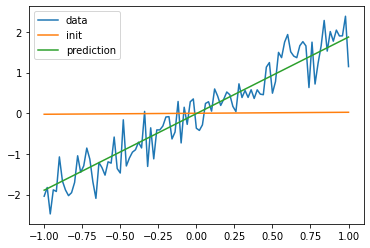

In [28]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Loading MNIST data from Keras
We use one of the dataset included in Keras: MNIST (https://en.wikipedia.org/wiki/MNIST_database).

In [30]:
from __future__ import print_function
import keras
from keras.datasets import mnist

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_val = x_test[:5000,:]
x_test = x_test[5000:,:]
y_val = y_test[:5000]
y_test = y_test[5000:]

## Simple autoencoder
The goal here is to a representation of our data with lower dimension. To do so, autoencoders first transform the data to a low-dimension representation using an encoder network, and then transform the low-dimension representation back to the original space using a decoder network.

Here we start with a single fully-connected neural layer as encoder and as decoder. We will be encoding MNIST digit images (dim=784) into a space of dimension 32, hence the compression factor is 784/32 = 24.5.

In [31]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Reshape data to fit the autoencoder layout and normalize it
x_train_ae = x_train.astype('float32') / 255.
x_test_ae = x_test.astype('float32') / 255.
x_val_ae = x_val.astype('float32') / 255.
x_train_ae = x_train_ae.reshape((len(x_train_ae), np.prod(x_train_ae.shape[1:])))
x_test_ae = x_test_ae.reshape((len(x_test_ae), np.prod(x_test_ae.shape[1:])))
x_val_ae = x_val_ae.reshape((len(x_val_ae), np.prod(x_val_ae.shape[1:])))

Train the autoencoder to reconstruct MNIST digits.

In [32]:
# Configure the model to use a per-pixel binary crossentropy loss, and Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Train the model for 10 epochs
autoencoder.fit(x_train_ae, x_train_ae, epochs=10, batch_size=256,
                shuffle=True, validation_data=(x_val_ae, x_val_ae))

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6951 - val_loss: 0.6948
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6948 - val_loss: 0.6945
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6945 - val_loss: 0.6943
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6927 - val_loss: 0.6925

Vizualize the reconstructed inputs and the encoded representations.

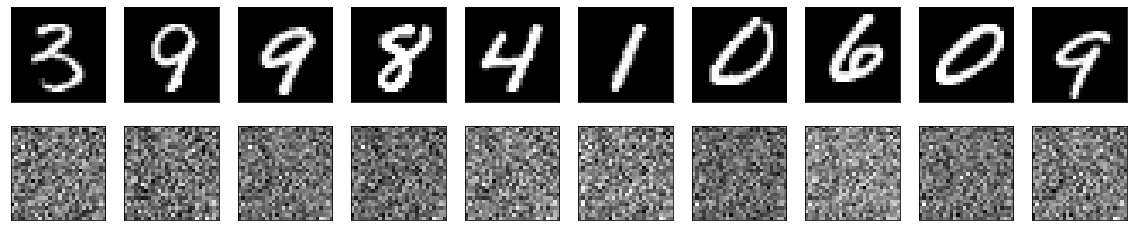

In [33]:
# Retrieve the encoder and decoder as separate networks
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

encoded_imgs = encoder.predict(x_test_ae)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_ae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Note that the autoencoder is not fully converged yet as it was trained on only 10 epochs. You may want to try and run it for longer to get better digit reconstruction.

## Convolutional Neural Network

### Simple CNN

Prepare data for CNN

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 1
num_train = 6000 # Max is 60000
num_test = 1000 # Max is 5000
num_val = 1000 # Max is 5000
# Only keep a subset of the data
x_train_cnn = x_train[:num_train,:,:,None]
y_train_cnn = y_train[:num_train]
x_test_cnn = x_test[:num_test,:,:,None]
y_test_cnn = y_test[:num_test]
x_val_cnn = x_test[:num_val,:,:,None]
y_val_cnn = y_test[:num_val]

x_train_cnn = x_train_cnn.astype('float32')
x_test_cnn = x_test_cnn.astype('float32')
x_val_cnn = x_test_cnn.astype('float32')
x_train_cnn /= 255.
x_test_cnn /= 255.
x_val_cnn /= 255.

# Convert class vectors to binary class matrices.
y_train_cnn = keras.utils.to_categorical(y_train_cnn, num_classes)
y_test_cnn = keras.utils.to_categorical(y_test_cnn, num_classes)
y_val_cnn = keras.utils.to_categorical(y_val_cnn, num_classes)

In [35]:
# Create CNN topology
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train_cnn.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit model to data
print(epochs)
model.fit(x_train_cnn, y_train_cnn, batch_size=batch_size, epochs=epochs,
              validation_data=(x_val_cnn, y_val_cnn), shuffle=True)

1
188/188 [==============================] - 78s 414ms/step - loss: 0.5356 - accuracy: 0.8355 - val_loss: 0.2287 - val_accuracy: 0.9290


In [36]:
score = model.evaluate(x_test_cnn, y_test_cnn, batch_size=32, verbose=1)
print("\nTest accuracy is {}%".format(100.0*score[1]))

32/32 [==============================] - 2s 50ms/step - loss: 0.2287 - accuracy: 0.9290

Test accuracy is 92.90000200271606%


### Adding dropout and pooling to the CNN
Max pooling and dropouts are tricks that improve deep neural networks.

Max pooling (http://yann.lecun.com/exdb/publis/pdf/boureau-icml-10.pdf) speeds up CNN training and encourages CNN to learn translation-invariant features.
Dropout (https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) is a regularisation technique preventing the model from overfitting the data.

In [37]:
# Create CNN topology
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_cnn.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit model to data
epochs = 3
model.fit(x_train_cnn, y_train_cnn, batch_size=batch_size, epochs=epochs,
              validation_data=(x_val_cnn, y_val_cnn), shuffle=True)

Epoch 1/3
188/188 [==============================] - 18s 98ms/step - loss: 1.4557 - accuracy: 0.5243 - val_loss: 0.4048 - val_accuracy: 0.8870
Epoch 2/3
188/188 [==============================] - 15s 82ms/step - loss: 0.5586 - accuracy: 0.8208 - val_loss: 0.2270 - val_accuracy: 0.9290
Epoch 3/3
188/188 [==============================] - 16s 83ms/step - loss: 0.3788 - accuracy: 0.8822 - val_loss: 0.1650 - val_accuracy: 0.9460


Evaluate model score on test set.

In [38]:
score = model.evaluate(x_test_cnn, y_test_cnn, batch_size=32, verbose=1)
print("\nTest accuracy is {}%".format(100.0*score[1]))

32/32 [==============================] - 0s 15ms/step - loss: 0.1650 - accuracy: 0.9460

Test accuracy is 94.59999799728394%
